# Exploratory Data Analysis (EDA) of Brain Tumor MRI Images
This notebook performs basic exploratory data analysis (EDA) on the brain tumor MRI image dataset. Note this dataset was generated using the **generate_new_train_test.py** script. The primary objectives are:
- To assess the dataset structure and class distribution.
- To visualize representative images from each class.
- To prepare for downstream tasks such as data augmentation and model training.

**Author:** Tomasz Lasota  
**Date:** 2025-08-11  
**Version:** 1.0

## Importing Required Libraries and Setting Up Directory Paths

We begin by importing essential Python libraries for image processing, data manipulation, and visualization. Next, we define the paths to the training and testing datasets.


In [1]:
import os, random, cv2, math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from itertools import cycle
import seaborn as sns
from pathlib import Path

In [2]:
# Set up directories
training_dir = Path("C:/Users/tomla/Documents/Projects/brain_tumor_classifier/data/combined_split_simple/training/")
testing_dir = Path("C:/Users/tomla/Documents/Projects/brain_tumor_classifier/data/combined_split_simple/testing/")

training_subfolders = [f for f in os.listdir(training_dir) if os.path.isdir(os.path.join(training_dir, f))]
testing_subfolders = [f for f in os.listdir(testing_dir) if os.path.isdir(os.path.join(testing_dir, f))]

OUTPUT_EDA = "C:/Users/tomla/Documents/Projects/brain_tumor_classifier/outputs/eda/v02/"

## Sample Image Visualization from Each Class

We randomly select and display sample images from each tumor category to assess image quality and variations in visual patterns across classes.


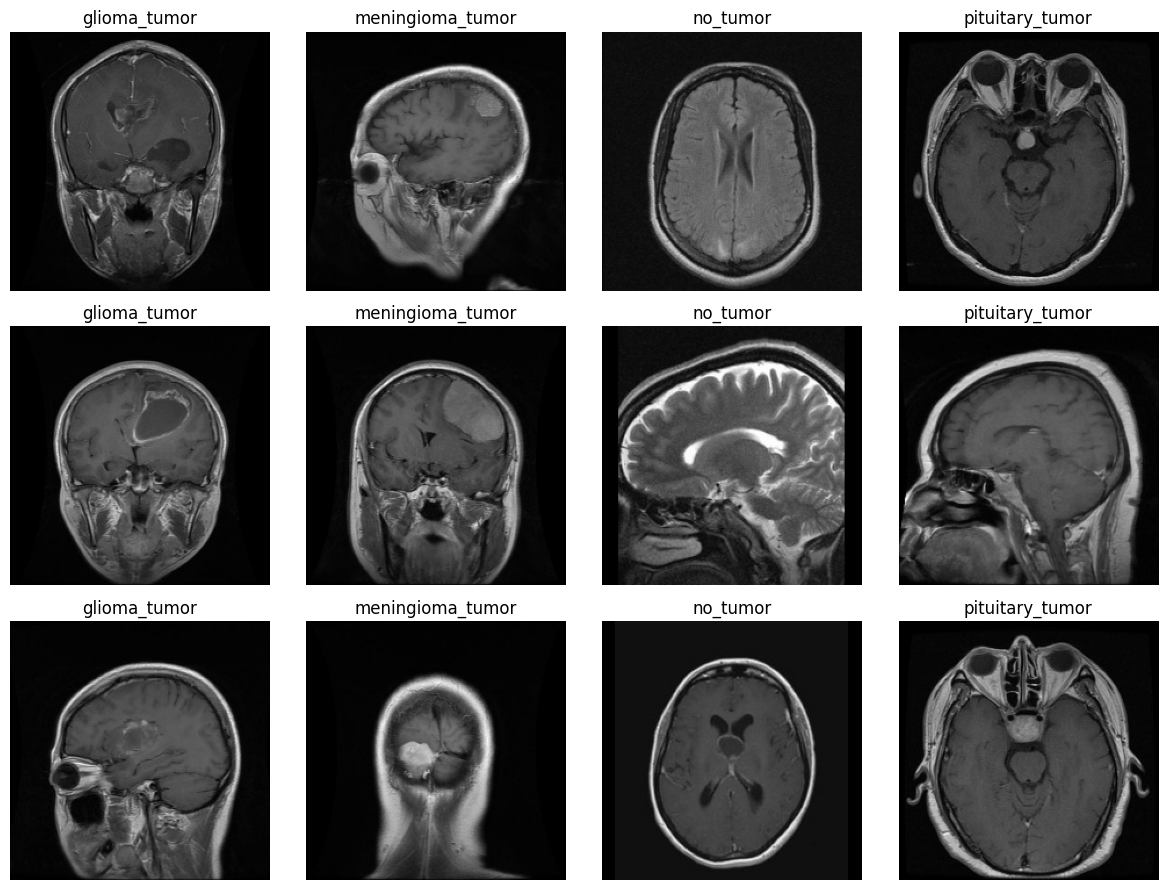

In [3]:
# Vizualize random examples of training data

# Get images grouped by folder
folder_training = {}
for folder in training_subfolders:
    path = os.path.join(training_dir, folder)
    images = [os.path.join(path, img) for img in os.listdir(path) 
              if img.endswith(('.jpg', '.png', '.webp'))]
    random.shuffle(images)  # Shuffle the images
    folder_training[folder] = images

# Round-robin selection
training_imgs = []
cycle_folder = cycle(training_subfolders)
while len(training_imgs) < 12:
    folder = next(cycle_folder)
    if folder_training[folder]:
        training_imgs.append(folder_training[folder].pop())

# Plot the images
ncol = 4
nrows = math.ceil(len(training_imgs) / ncol)
plt.figure(figsize=(ncol * 3, nrows * 3))

for i, img_path in enumerate(training_imgs):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(nrows, ncol, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.axis('off')

plt.tight_layout()

# Save the plot
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "training_examples.png"))

plt.show()

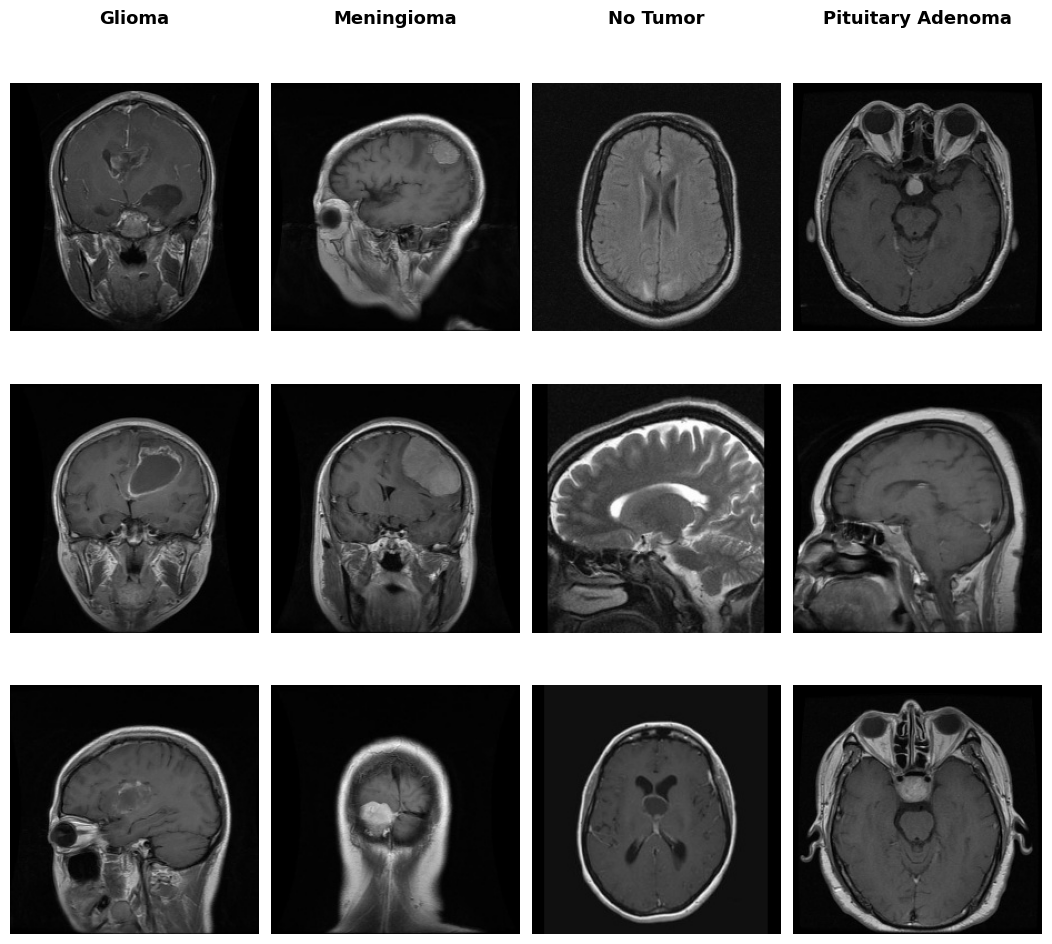

In [4]:
# Improve the display of images for publication

scientific_names = {
    "glioma_tumor": "Glioma",
    "meningioma_tumor": "Meningioma",
    "no_tumor": "No Tumor",
    "pituitary_tumor": "Pituitary Adenoma"
}

# Define layout
ncol = 4
nrows = math.ceil(len(training_imgs) / ncol)
fig = plt.figure(figsize=(ncol * 3, (nrows + 0.6) * 3))  # slightly smaller height

# Define tighter layout
gs = gridspec.GridSpec(nrows + 1, ncol, height_ratios=[0.05] + [1] * nrows)

# Get column labels from the first row
column_labels = []
for col in range(ncol):
    if col < len(training_imgs):
        raw_label = os.path.basename(os.path.dirname(training_imgs[col]))
        column_labels.append(scientific_names.get(raw_label, raw_label))
    else:
        column_labels.append("")

# Plot column headers
for col in range(ncol):
    ax = plt.subplot(gs[0, col])
    ax.set_title(column_labels[col], fontsize=13, fontweight='bold')
    ax.axis('off')

# Plot images
for i, img_path in enumerate(training_imgs):
    row = i // ncol + 1  # +1 because first row is header
    col = i % ncol

    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = plt.subplot(gs[row, col])
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(top=0.90, bottom=0.05, left=0.07, right=0.93, hspace=0.10, wspace=0.05)
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "training_examples_main.png"))
plt.show()

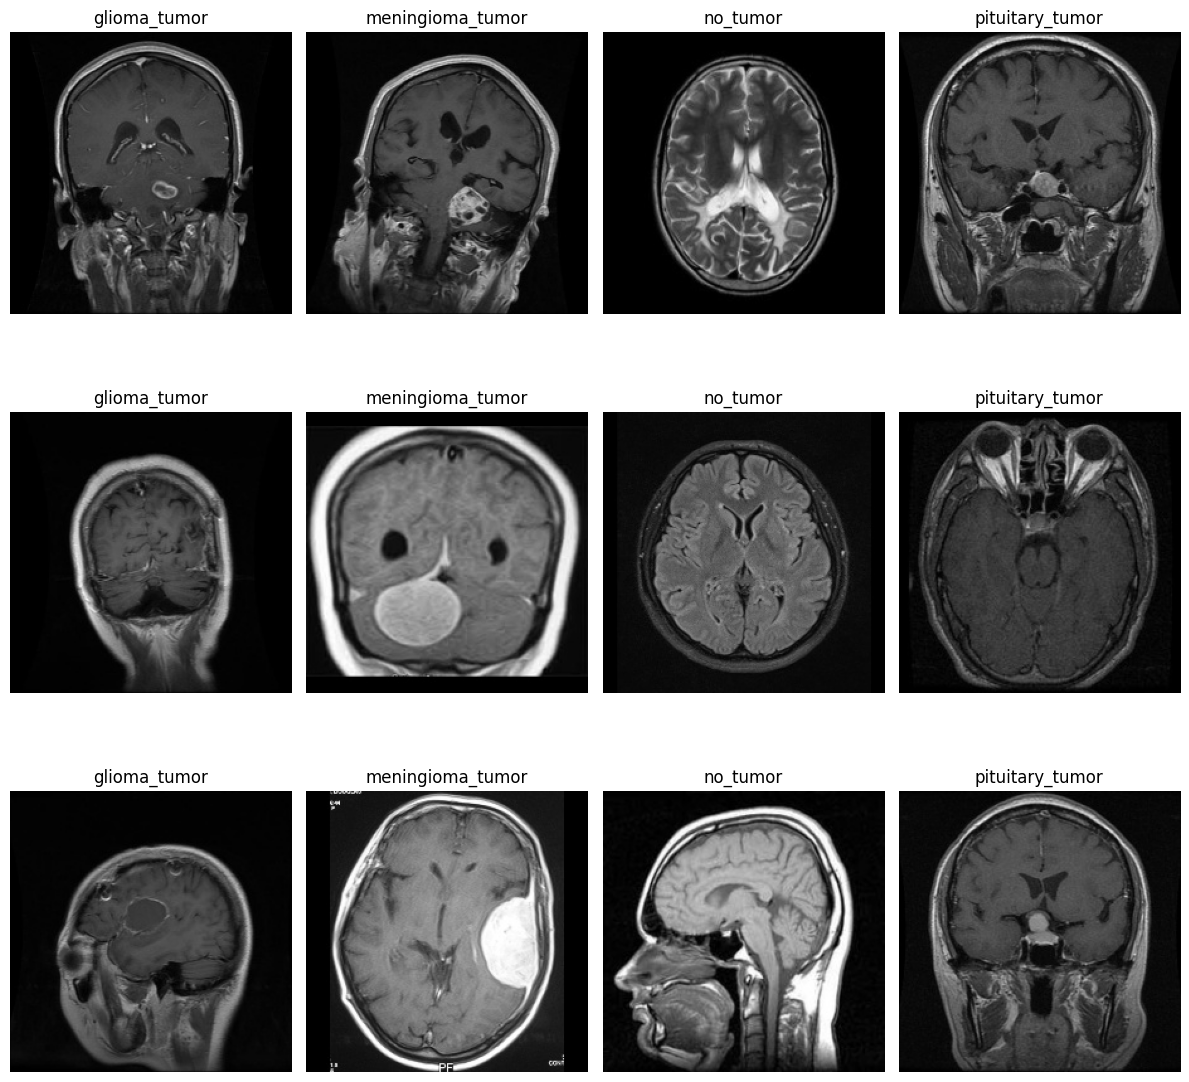

In [5]:
# Vizualize random examples of testing data

# Get images grouped by folder
folder_testing = {}
for folder in testing_subfolders:
    path = os.path.join(testing_dir, folder)
    images = [os.path.join(path, img) for img in os.listdir(path) 
              if img.endswith(('.jpg', '.png', '.webp'))]
    random.shuffle(images)  # Shuffle the images
    folder_testing[folder] = images

# Round-robin selection
testing_imgs = []
cycle_folder = cycle(testing_subfolders)
while len(testing_imgs) < 12:
    folder = next(cycle_folder)
    if folder_testing[folder]:
        testing_imgs.append(folder_testing[folder].pop())

# Plot the images
plt.figure(figsize=(12, 12))
ncol = 4
nrows = math.ceil(len(testing_imgs) / ncol)
for i, img_path in enumerate(testing_imgs):
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(nrows, ncol, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.axis('off')

plt.tight_layout()

# Save the plot
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "testing_examples.png"))

plt.show()

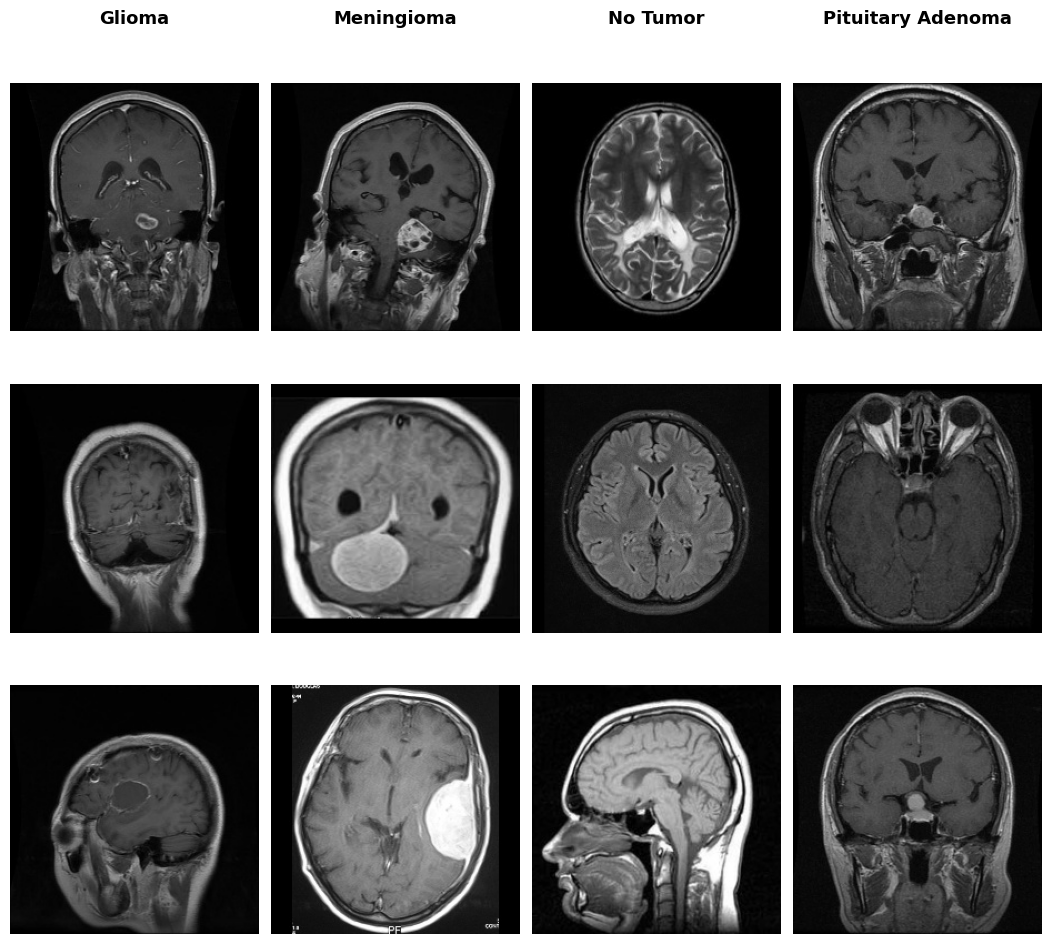

In [6]:
# Improve the display of images for publication

# Define layout
ncol = 4
nrows = math.ceil(len(testing_imgs) / ncol)
fig = plt.figure(figsize=(ncol * 3, (nrows + 0.6) * 3))  # slightly smaller height

# Define tighter layout
gs = gridspec.GridSpec(nrows + 1, ncol, height_ratios=[0.05] + [1] * nrows)

# Get column labels from the first row
column_labels = []
for col in range(ncol):
    if col < len(testing_imgs):
        raw_label = os.path.basename(os.path.dirname(testing_imgs[col]))
        column_labels.append(scientific_names.get(raw_label, raw_label))
    else:
        column_labels.append("")

# Plot column headers
for col in range(ncol):
    ax = plt.subplot(gs[0, col])
    ax.set_title(column_labels[col], fontsize=13, fontweight='bold')
    ax.axis('off')

# Plot images
for i, img_path in enumerate(testing_imgs):
    row = i // ncol + 1  # +1 because first row is header
    col = i % ncol

    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = plt.subplot(gs[row, col])
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.subplots_adjust(top=0.90, bottom=0.05, left=0.07, right=0.93, hspace=0.10, wspace=0.05)
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "testing_examples_main.png"))
plt.show()

## Class Distribution in Training and Testing Sets

We compute and visualize the distribution of images across different tumor categories in both training and testing datasets. This helps identify class imbalance, which can impact model performance.


C:\Users\tomla\AppData\Local\Temp\ipykernel_55236\684835371.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


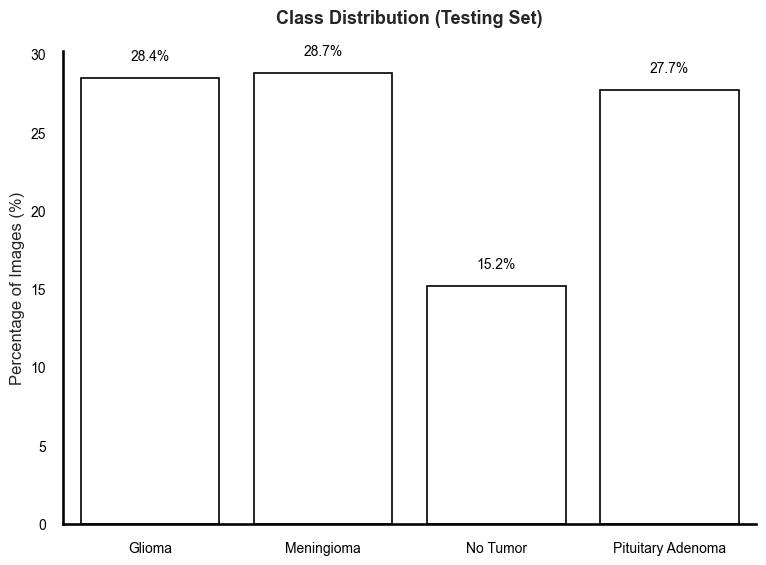

Total count per class:  {'glioma_tumor': 182, 'meningioma_tumor': 184, 'no_tumor': 97, 'pituitary_tumor': 177}


In [7]:
# Analysis of class distribution in testing data

# Count images per class
class_counts = {cls: len(imgs) for cls, imgs in folder_testing.items()}
total_images = sum(class_counts.values())

# Convert counts to percentages
class_percentages = {scientific_names.get(cls, cls): (count / total_images) * 100 for cls, count in class_counts.items()}
df_percent = pd.DataFrame(list(class_percentages.items()), columns=["Class", "Percentage"])

# Set black & white theme
sns.set_theme(
    style="white",
    context="talk",
    rc={"axes.edgecolor": "black", "xtick.color": "black", "ytick.color": "black"},
)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_percent,
    x="Class",
    y="Percentage",
    palette=["white"] * len(df_percent),  # White fill
    edgecolor="black",
    linewidth=1.2,
)

# Add % labels on top of each bar
for i, row in df_percent.iterrows():
    ax.text(i, row["Percentage"] + 1, f"{row['Percentage']:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Axis styling
ax.set_xlabel("")
ax.set_ylabel("Percentage of Images (%)", fontsize=12)
ax.set_title("Class Distribution (Testing Set)", fontsize=13, weight="bold", pad=20)
ax.tick_params(axis="x")
ax.tick_params(axis="both", labelsize=10)

sns.despine()
plt.tight_layout()

# Save figure
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "testing_class_distribution.png"))
plt.show()

print("Total count per class: ", class_counts)

C:\Users\tomla\AppData\Local\Temp\ipykernel_55236\3503762896.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


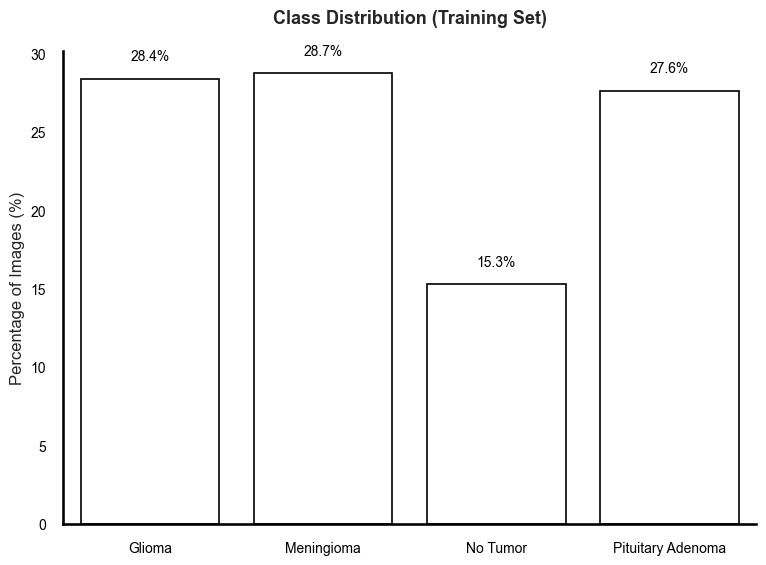

Total count per class:  {'glioma_tumor': 738, 'meningioma_tumor': 747, 'no_tumor': 397, 'pituitary_tumor': 718}


In [8]:
# Analysis of class distribution in training data

# Count images per class
class_counts = {cls: len(imgs) for cls, imgs in folder_training.items()}
total_images = sum(class_counts.values())

# Convert counts to percentages
class_percentages = {scientific_names.get(cls, cls): (count / total_images) * 100 for cls, count in class_counts.items()}
df_percent = pd.DataFrame(list(class_percentages.items()), columns=["Class", "Percentage"])

# Set black & white theme
sns.set_theme(
    style="white",
    context="talk",
    rc={"axes.edgecolor": "black", "xtick.color": "black", "ytick.color": "black"},
)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_percent,
    x="Class",
    y="Percentage",
    palette=["white"] * len(df_percent),  # White fill
    edgecolor="black",
    linewidth=1.2,
)

# Add % labels on top of each bar
for i, row in df_percent.iterrows():
    ax.text(i, row["Percentage"] + 1, f"{row['Percentage']:.1f}%", 
            ha='center', va='bottom', fontsize=10, color='black')

# Axis styling
ax.set_xlabel("")
ax.set_ylabel("Percentage of Images (%)", fontsize=12)
ax.set_title("Class Distribution (Training Set)", fontsize=13, weight="bold", pad=20)
ax.tick_params(axis="x")
ax.tick_params(axis="both", labelsize=10)

sns.despine()
plt.tight_layout()

# Save figure
# os.makedirs(OUTPUT_EDA, exist_ok=True)
# plt.savefig(os.path.join(OUTPUT_EDA, "training_class_distribution.png"))
plt.show()

print("Total count per class: ", class_counts)

### 📌 Summary

This exploratory data analysis (EDA) provides an initial assessment of the brain tumor MRI dataset in preparation for classification model development. The dataset is divided into training and testing sets, each containing images categorized into four diagnostic classes: **glioma tumor**, **meningioma tumor**, **pituitary tumor**, and **no tumor**.

Class distribution across the datasets is generally well balanced. Each tumor class constitutes approximately 28% of the training set, while the *no tumor* class is slightly underrepresented at **15.2%**. This mild imbalance may warrant consideration for data augmentation or class weighting strategies during model training.

Visual inspection of sample images from each class reveals good diversity in anatomical cross-sections and image contrast. Images span multiple views (e.g., axial, coronal, sagittal), which may provide complementary spatial features useful for model discrimination. However, image dimensions are not consistent across samples. To address this, a **resizing and padding function** was implemented to ensure uniform input size, which is critical for batch processing and neural network compatibility. Note that this was implemented using **resize_images.py** script. 

Overall, the dataset exhibits sufficient structural integrity and class representation to support the development of a robust classification model. Key preprocessing steps such as image normalization, resizing, and class-aware augmentation will be crucial for optimal model performance.

